# MNIST Digits Classification using Neural Networks



Mount your drive in order to run locally with colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

download & load the MNIST dataset.

*just run the next two cells and observe the outputs (shift&enter) 

the training data set contains 60000 samples
each sample image from the training data set is a column-stacked grayscale image of 784 pixels
 this vectorized arrangement of the data is suitable for a Fully-Connected NN (as apposed to a Convolutional NN)
these column-stacked images can be reshaped to an image of (28, 28) pixels


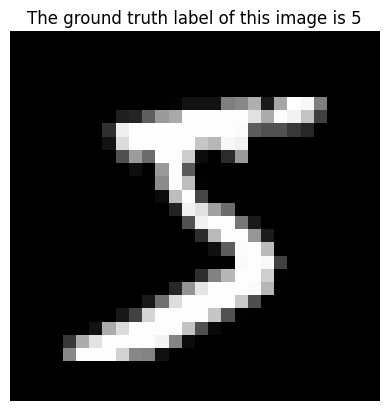

In [1]:

#importing modules that will be in use
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import gzip
import pickle
from PIL import Image
import random
import numpy as np

def _download(file_name):
    file_path = os.path.join(dataset_dir,file_name)

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_name)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path =  os.path.join(dataset_dir, file_name)

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = os.path.join(dataset_dir,file_name)

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """
    Parameters
    ----------
    normalize : Normalize the pixel values
    flatten : Flatten the images as one array
    one_hot_label : Encode the labels as a one-hot array

    Returns
    -------
    (Trainig Image, Training Label), (Test Image, Test Label)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


# Load the MNIST dataset
url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = ''
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True)


# printing data shape

print('the training data set contains '+ str(x_train.shape[0]) + ' samples')

img = x_train[0]
label = t_train[0]

img = img.reshape(28, 28)
print('each sample image from the training data set is a column-stacked grayscale image of '+ str(x_train.shape[1]) +' pixels'
      + '\n this vectorized arrangement of the data is suitable for a Fully-Connected NN (as apposed to a Convolutional NN)' )
print('these column-stacked images can be reshaped to an image of ' +str(img.shape)+ ' pixels')

# printing a sample from the dataset

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('The ground truth label of this image is '+str(label))
plt.show()

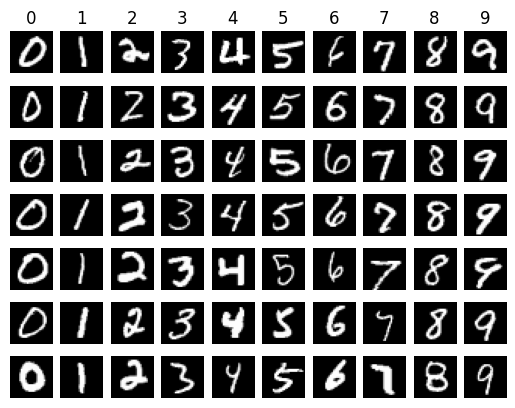

In [7]:
# Visualize some examples from the dataset.
# We'll show a few examples of training images from each class.
num_classes = 10
samples_per_class = 7
for cls in range(num_classes):
    idxs = np.argwhere(t_train==cls)
    sample = np.random.choice(idxs.shape[0], samples_per_class, replace=False) # randomly picks 7 from the appearences 
    idxs=idxs[sample]

    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + cls + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        img = x_train[idx].reshape(28, 28)

        plt.imshow(img, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

**QUESTION 1**:What are vanishing gradients? Name one known activation function that has this problem and one that does not.

**ANSWER**:








here we will implement the sigmoid activation function and it's gradient 

In [19]:

def sigmoid(x):
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################   
    
    sig = 1 / (1 + np.exp(-x))
    
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return sig
def sigmoid_grad(x):
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################   

    sig_grad = sigmoid(x) * (1 - sigmoid(x))
    
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return sig_grad


Implement a fully-vectorized loss function for the Softmax classifier
Make sure the softmax is stable.
To make our softmax function numerically stable,we simply normalize the values in the vector, 
by multiplying the numerator and denominator with a constant C.
We can choose an arbitrary value for log(C) term, but generally log(C)=−max(a) is chosen, as it shifts all of elements in the vector to negative to zero, and negatives with large exponents saturate to zero rather than the infinity.

In [3]:
def softmax(x):
    """
  Softmax loss function, should be implemented in a vectorized fashion (without loops)


  Inputs:
  - X: A numpy array of shape (N, C) containing a minibatch of data.
  Returns:
  - probabilities: A numpy array of shape (N, C) containing the softmax probabilities.

  if you are not careful here, it is easy to run into numeric instability
     """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################   
 
    
    x = x - np.max(x, axis=1).reshape(-1, 1)
    probabilities = np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)


    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return probabilities

def cross_entropy_error(y, t):
    """
    Inputs:

    - t:  A numpy array of shape (N,C) containing  a minibatch of training labels, it is a one-hot array, 
      with t[GT]=1 and t=0 elsewhere, where GT is the ground truth label ; 
    - y: A numpy array of shape (N, C) containing the softmax probabilities (the NN's output).

    Returns a tuple of:
    - loss as single float (do not forget to divide by the number of samples in the minibatch (N))
    """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################   
    # Compute loss 
    
    error = -(1/y.shape[0]) * np.log(np.sum(y * t, axis=1))
    

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return error

We will design and train a two-layer fully-connected neural network with sigmoid nonlinearity and
softmax cross entropy loss. We assume an input dimension of D=784, a hidden dimension of H, and perform classification over C classes.

The architecture should be fullyconnected -> sigmoid -> fullyconnected -> softmax.

The learnable parameters of the model are stored in the dictionary,
'params', that maps parameter names to numpy arrays.

In the next cell we will initialize the weights and biases, design the fully connected(fc) forward and backward functions that will be in use for the training (using SGD).



In [4]:
params = {'w1': 123, 'w2': 312, 'b1': "fdgsdg", 'b2': "fsadfa"}
print(params['w1'])

123


In [23]:
def TwoLayerNet( input_size, hidden_size, output_size, weight_init_std=0.01):
    ############################################################################
    # TODO: Initialize the weights and biases of the two-layer net. Weights    #
    # should be initialized from a Gaussian with standard deviation equal to   #
    # weight_init_std, and biases should be initialized to zero. All weights and  #
    # biases should be stored in the dictionary 'params', with first layer  #
    # weights and biases using the keys 'W1' and 'b1' and second layer weights #
    # and biases using the keys 'W2' and 'b2'.                                 #
    ############################################################################
    
    w1 = np.random.normal(0, weight_init_std, (input_size, hidden_size))
    w2 = np.random.normal(0, weight_init_std, (hidden_size, output_size))
    
    b1 = np.zeros(hidden_size)
    b2 = np.zeros(output_size)

    params = {'W1': w1, 'W2': w2, 'b1': b1, 'b2': b2}
    
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################
    return params


def FC_forward(x, w, b):
    """
    Computes the forward pass for a fully-connected layer.
    The input x has shape (N, D) and contains a minibatch of N
    examples, where each example x[i] has shape D and will be transformed to an output vector of dimension M.
    Inputs:
    - x: A numpy array containing input data, of shape (N, D)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output result of the forward pass, of shape (N, M)
    - cache: (x, w, b)
    """
    out = None
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################   

    out = np.dot(x, w) + b
    
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    cache = (x, w, b)
    return out, cache



def FC_backward(dout, cache):
    """
    Computes the backward pass for a fully-connected layer.
    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
    - w: Weights, of shape (D, M)
    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, D)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """
    x, w, b = cache
    dx, dw, db = None, None, None
    
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################   
    
    dx=np.dot(dout,w.T)
    dw=np.dot(x.T,dout)
    db=np.sum(dout, axis = 0) 
    
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return dx, dw, db



Here we will design the entire model, which outputs the NN's probabilities and gradients.


In [6]:
def Model(params, x, t):
    """
    Computes the backward pass for a fully-connected layer.
    Inputs:
    - params:  dictionary with first layer weights and biases using the keys 'W1' and 'b1' and second layer weights
    and biases using the keys 'W2' and 'b2'. each with dimensions corresponding its input and output dimensions.  
    - x: Input data, of shape (N,D)
    - t:  A numpy array of shape (N,C) containing training labels, it is a one-hot array, 
      with t[GT]=1 and t=0 elsewhere, where GT is the ground truth label ; 
    Returns:
    - y: the output probabilities for the minibatch (at the end of the forward pass) of shape (N,C)
    - grads: dictionary containing gradients of the loss with respect to W1, W2, b1, b2.
    
    note: use the FC_forward ,FC_backward functions.

    """
    W1, W2 = params['W1'], params['W2']
    b1, b2 = params['b1'], params['b2']
    grads = {'W1': None ,'W2': None, 'b1': None ,'b2': None }

    batch_num = x.shape[0]

    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################   
    # forward (fullyconnected -> sigmoid -> fullyconnected -> softmax).
    l1, cache_1 = FC_forward(x, W1, b1)
    h = sigmoid(l1)
    l2, cache_2 = FC_forward(h, W2, b2)
    y = softmax(l2)
    
    
    # backward - calculate gradients.
    dcost_dh, grads['W2'], grads['b2'] = FC_backward((y-t), (h, params['W2'], params['b2']))
    grads['x'], grads['W1'], grads['b1'] = FC_backward(dcost_dh * sigmoid_grad(l1), (x, params['W1'], params['b1']))
    
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    
    return grads, y

Compute the accuracy of the NNs predictions.


In [26]:


def accuracy(y,t):
    """
    Computes the accuracy of the NN's predictions.
    Inputs:
    - t:  A numpy array of shape (N,C) containing training labels, it is a one-hot array, 
      with t[GT]=1 and t=0 elsewhere, where GT is the ground truth label ; 
    - y: the output probabilities for the minibatch (at the end of the forward pass) of shape (N,C)
    Returns:
    - accuracy: a single float of the average accuracy.
    """
    #############################################################################
    #                             YOUR CODE                                     #
    #############################################################################   
    gt_ind = np.argmax(t,axis=1)
    net_ind = np.argmax(y,axis=1)
    
    correct_count = np.sum((gt_ind - net_ind) == 0)
    
    accuracy = (correct_count / len(gt_ind)) * 100
    
    
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################    
    return accuracy



Trianing the model:
To train our network we will use minibatch SGD.  
*Note that the test dataset is actually used as the validation dataset in the training

training of 10 epochs, each epoch will have 469 iterations
train acc: 77.61% |  test acc: 92.62% |  loss for epoch 0: 0.005676925183998301
train acc: 93.01% |  test acc: 94.27% |  loss for epoch 1: 0.0018429101350570202
train acc: 94.65% |  test acc: 95.03% |  loss for epoch 2: 0.0014125070313826243
train acc: 95.91% |  test acc: 95.50999999999999% |  loss for epoch 3: 0.001125583868051193
train acc: 96.40% |  test acc: 96.28999999999999% |  loss for epoch 4: 0.0009643927436130868
train acc: 96.93% |  test acc: 95.88% |  loss for epoch 5: 0.0008299692821971796
train acc: 97.32% |  test acc: 96.46000000000001% |  loss for epoch 6: 0.0007430812736483566
train acc: 97.39% |  test acc: 96.82% |  loss for epoch 7: 0.0006750959887299404
train acc: 97.86% |  test acc: 96.99% |  loss for epoch 8: 0.0005974648036228317
train acc: 98.02% |  test acc: 97.1% |  loss for epoch 9: 0.0005354128548649942


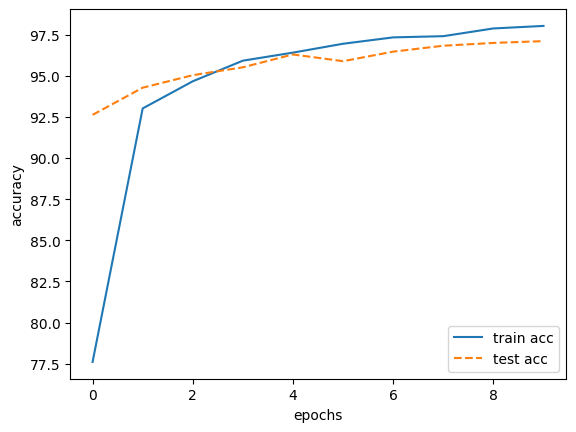

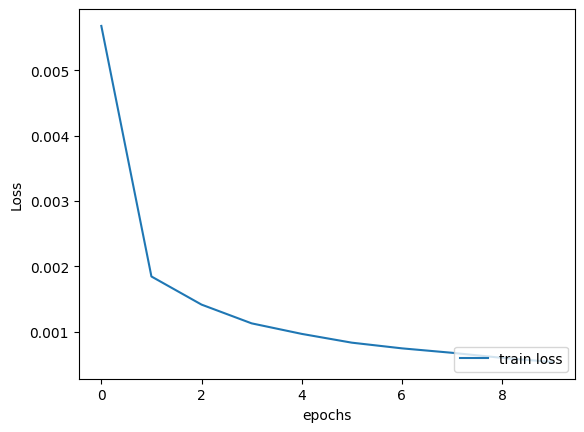

In [137]:


# You should be able to receive at least 97% accuracy, choose hyperparameters accordingly.

epochs = 10
mini_batch_size = 128
learning_rate = 1e-2
num_hidden_cells = 200

def Train(epochs_num, batch_size, lr, H):
    #  Dividing a dataset into training data and test data

    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
    C=10
    D=x_train.shape[1]
    network_params = TwoLayerNet(input_size=D, hidden_size=H, output_size=C) #hidden_size is the only hyperparameter here

    train_size = x_train.shape[0]
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    iter_per_epoch = round(train_size / batch_size)
    
    print('training of ' + str(epochs_num) +' epochs, each epoch will have '+ str(iter_per_epoch)+ ' iterations')
    for i in range(epochs_num):
    
        train_loss_iter= []
        train_acc_iter= []

        for k in range(iter_per_epoch):
            
            
            #############################################################################
            #                             YOUR CODE                                     #
            #############################################################################               
            # 1. Select part of training data (mini-batch) randomly
            
            rand_ind = np.random.randint(1, x_train.shape[0], mini_batch_size)
            
            x_batch = x_train[rand_ind, :]
            t_batch = t_train[rand_ind]
            

            # 2. Calculate the predictions and the gradients to reduce the value of the loss function
            grads, y_batch = Model(network_params, x_batch, t_batch)
            
            # 3. Update weights and biases with the gradients 
            network_params['W1'] = network_params['W1'] - learning_rate * grads['W1']
            network_params['W2'] = network_params['W2'] - learning_rate * grads['W2']
            network_params['b1'] = network_params['b1'] - learning_rate * grads['b1']
            network_params['b2'] = network_params['b2'] - learning_rate * grads['b2']
            
            #############################################################################
            #                             END OF YOUR CODE                              #
            #############################################################################            
        
            # Calculate the loss and accuracy for visalizaton 

            error=cross_entropy_error(y_batch, t_batch)
            train_loss_iter.append(error)
            acc_iter=accuracy(y_batch, t_batch)
            train_acc_iter.append(acc_iter)
            if k == iter_per_epoch-1:
                train_acc = np.mean(train_acc_iter)
                train_acc_list.append(train_acc)
                train_loss_list.append(np.mean(train_loss_iter))

                _, y_test = Model(network_params, x_test, t_test)
                test_acc = accuracy(y_test, t_test)
                test_acc_list.append(test_acc)
                print("train acc: " + str(train_acc)[:5] + "% |  test acc: "   + str(test_acc) + "% |  loss for epoch " + str(i) +": "+ str(np.mean(train_loss_iter)))
    return train_acc_list, test_acc_list, train_loss_list, network_params

train_acc, test_acc, train_loss, net_params = Train(epochs, mini_batch_size, learning_rate, num_hidden_cells)

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc))
plt.plot(x, train_acc, label='train acc')
plt.plot(x, test_acc, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc='lower right')
plt.show()


markers = {'train': 'o'}
x = np.arange(len(train_loss))
plt.plot(x, train_loss, label='train loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(loc='lower right')
plt.show()


# You should be able to receive at least 97% accuracy, choose hyperparameters accordingly.


**QUESTION 2:** Explain the results looking at the visualizations above, base your answer on the hyperparameters.

**ANSWER:**





**QUESTION** 3: Suggest a way to improve the results by changing the networks's architecture  

**ANSWER**:




(784, 30)


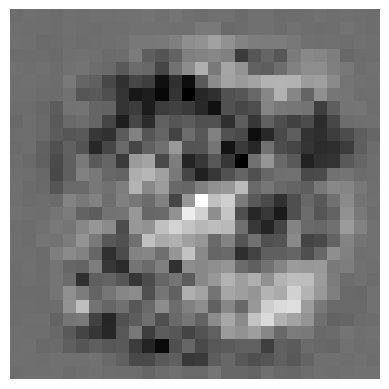

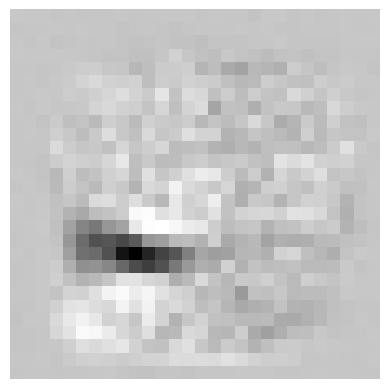

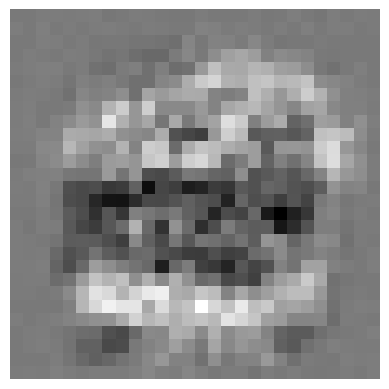

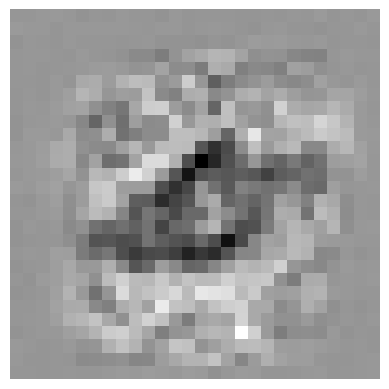

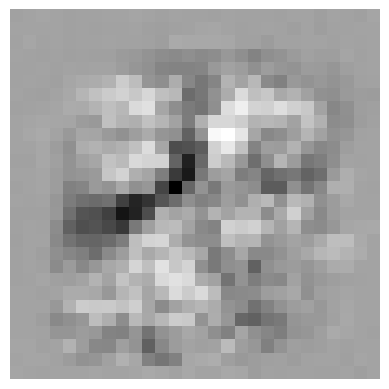

In [27]:
# Visualize some weights. features of digits should be somehow present.
def show_net_weights(params):
    W1 = params['W1']
    print(W1.shape)
    for i in range(5):
        W = W1[:,i*5].reshape(28, 28)
        plt.imshow(W,cmap='gray')
        plt.axis('off')
        plt.show()

show_net_weights(net_params)


3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


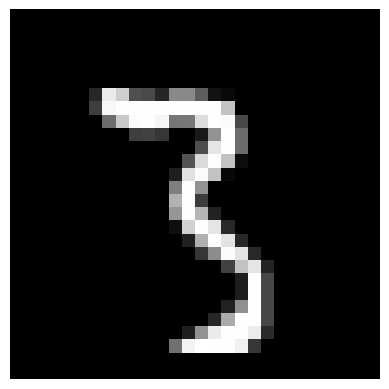

In [46]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
ind = [2011, 2001]
_, y_batch = Model(net_params, x_test[ind, :], t_test[ind])


img = x_test[ind[0], :].reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.axis('off')
print(np.argmax(y_batch[0]))
print(t_test[ind[0]])

Implement, train and test the same two-layer network, using a **deep learning library** (pytorch/tensorflow/keras).

As before, you should be able to receive at least 97% accuracy.

Please note, that in this section you will need to implement the model, the training and the testing by yourself (you may use the code in earlier sections)
Don't forget to print the accuracy during training (in the same format as before).

For installing a deep learning library, you should use "!pip3 install..." (lookup the compatible syntex for your library)

In [95]:
 #############################################################################
 #                             YOUR CODE                                     #
 #############################################################################   
# !pip install tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds


In [133]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [134]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(normalize_img)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
# ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(normalize_img)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
# ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [136]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(200, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(1),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=30,
    validation_data=ds_test,
)

Epoch 1/30
469/469 [==============================] - 5s 8ms/step - loss: 0.4941 - sparse_categorical_accuracy: 0.8670 - val_loss: 0.2769 - val_sparse_categorical_accuracy: 0.9198
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2287 - sparse_categorical_accuracy: 0.9331 - val_loss: 0.2031 - val_sparse_categorical_accuracy: 0.9418
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1736 - sparse_categorical_accuracy: 0.9499 - val_loss: 0.1602 - val_sparse_categorical_accuracy: 0.9512
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1400 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.1320 - val_sparse_categorical_accuracy: 0.9607
Epoch 5/30
469/469 [==============================] - 4s 7ms/step - loss: 0.1177 - sparse_categorical_accuracy: 0.9656 - val_loss: 0.1164 - val_sparse_categorical_accuracy: 0.9634
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1003 - sparse_categorica